[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_detectron2.ipynb)

## 0. Preperation

- Install latest version of SAHI and Detectron2:

In [14]:
!pip install -U sahi
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.10/index.html # for Detectron2-cpu
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html # for Detectron2-cuda11.1

In [1]:
import os
os.getcwd()

'/home/fatihakyon/dev/obss/sahi/demo'

- Import required modules:

In [2]:
# will be used for detectron2 fasterrcnn model zoo name
from sahi.utils.detectron2 import Detectron2TestConstants

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [3]:
# set detectron2 fasterrcnn model zoo name
model_path = Detectron2TestConstants.FASTERCNN_MODEL_ZOO_NAME

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a Detectron2 Model

- Instantiate a detection model by defining model weight path, confing path and other parameters:

In [4]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='detectron2',
    model_path=model_path,
    config_path=model_path,
    confidence_threshold=0.5,
    image_size=640,
    device="cpu", # or 'cuda:0'
)

09/27/2022 17:44:09 - INFO - fvcore.common.checkpoint -   [Checkpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...
09/27/2022 17:44:09 - INFO - iopath.common.file_io -   URL https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl cached in /home/fatihakyon/.torch/iopath_cache/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
09/27/2022 17:44:09 - INFO - fvcore.common.checkpoint -   Reading a file from 'Detectron2 Model Zoo'


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [6]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

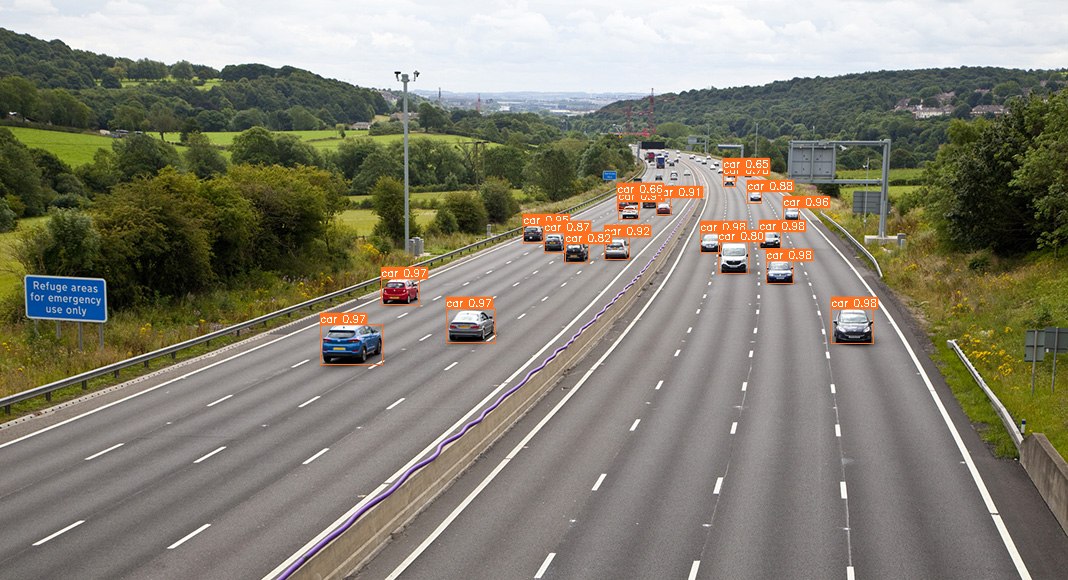

In [7]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Detectron2 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [8]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

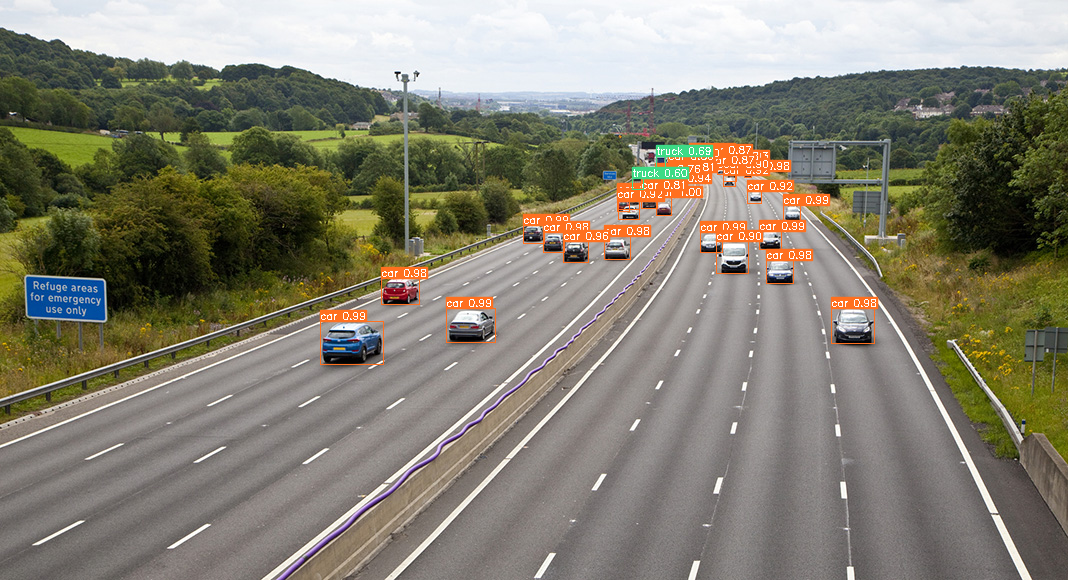

In [9]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [10]:
object_prediction_list = result.object_prediction_list

In [11]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(656, 197, 671, 215), w: 15, h: 18>,
    mask: None,
    score: PredictionScore: <value: 0.9950496554374695>,
    category: Category: <id: 2, name: car>>

In [9]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [656, 197, 15, 18],
  'score': 0.9950494170188904,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 270},
 {'image_id': None,
  'bbox': [446, 308, 49, 34],
  'score': 0.9942395687103271,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1666},
 {'image_id': None,
  'bbox': [759, 231, 22, 18],
  'score': 0.9921348094940186,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 396}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [12]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [656, 197, 15, 18],
  'score': 0.9950496554374695,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 270},
 {'image_id': 1,
  'bbox': [446, 308, 49, 34],
  'score': 0.9942396879196167,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1666},
 {'image_id': 1,
  'bbox': [759, 231, 22, 18],
  'score': 0.9921349287033081,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 396}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install -U imantics

In [13]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [14]:
model_type = "detectron2"
model_path = model_path
model_config_path = model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 480
slice_width = 480
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [15]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


09/27/2022 17:45:01 - INFO - fvcore.common.checkpoint -   [Checkpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...
09/27/2022 17:45:01 - INFO - fvcore.common.checkpoint -   Reading a file from 'Detectron2 Model Zoo'
Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 6 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:01<00:03,  1.66s/it]

Prediction time is: 1628.41 ms
Performing prediction on 6 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:02<00:01,  1.14s/it]

Prediction time is: 728.87 ms
Performing prediction on 6 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

Prediction time is: 762.43 ms
Prediction results are successfully exported to runs/predict/exp18
